Proses :
1. data handling

## Data Handling
### 1. Import dataset

In [590]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [591]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.shape,test.shape

((891, 12), (418, 11))

In [592]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [593]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [594]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [595]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [596]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [597]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Ms            1
Capt          1
Mme           1
Jonkheer      1
Don           1
Sir           1
Lady          1
Name: Title, dtype: int64

In [598]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dona        1
Dr          1
Ms          1
Name: Title, dtype: int64

In [599]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [600]:
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [601]:
train.Title.value_counts()

0    517
1    182
2    125
3     67
Name: Title, dtype: int64

### 2. Identify missing values/Cleaning data

nama

In [602]:
# isi missing age dengan median age untuk tiap gelar (Bapak, Ibu, Nona, Lainnya)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [603]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

cabin

In [604]:
data_train = train.drop('Cabin',  axis=1)

In [605]:
data_train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
Title          0
dtype: int64

In [606]:
data_test=test.drop('Cabin', axis=1)

In [607]:
data_test.shape

(418, 10)

embarked

In [608]:
# find most frequent Embarked value and store in variable
most_embarked = data_train.Embarked.value_counts().index[0]

# fill NaN with most_embarked value
data_train.Embarked = data_train.Embarked.fillna(most_embarked)

In [609]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
Title          891 non-null int64
dtypes: float64(2), int64(6), object(3)
memory usage: 66.2+ KB


fare

In [610]:
# fill NaN with median fare
data_test.Fare = data_test.Fare.fillna(data_test.Fare.median())

# view changes
data_test.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Title          0
dtype: int64

In [611]:
data_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,S,0
5,6,0,3,male,30.0,0,0,330877,8.4583,Q,0
6,7,0,1,male,54.0,0,0,17463,51.8625,S,0
7,8,0,3,male,2.0,3,1,349909,21.0750,S,3
8,9,1,3,female,27.0,0,2,347742,11.1333,S,2
9,10,1,2,female,14.0,1,0,237736,30.0708,C,2


Text(0.5, 1.0, 'Passengers per boarding location')

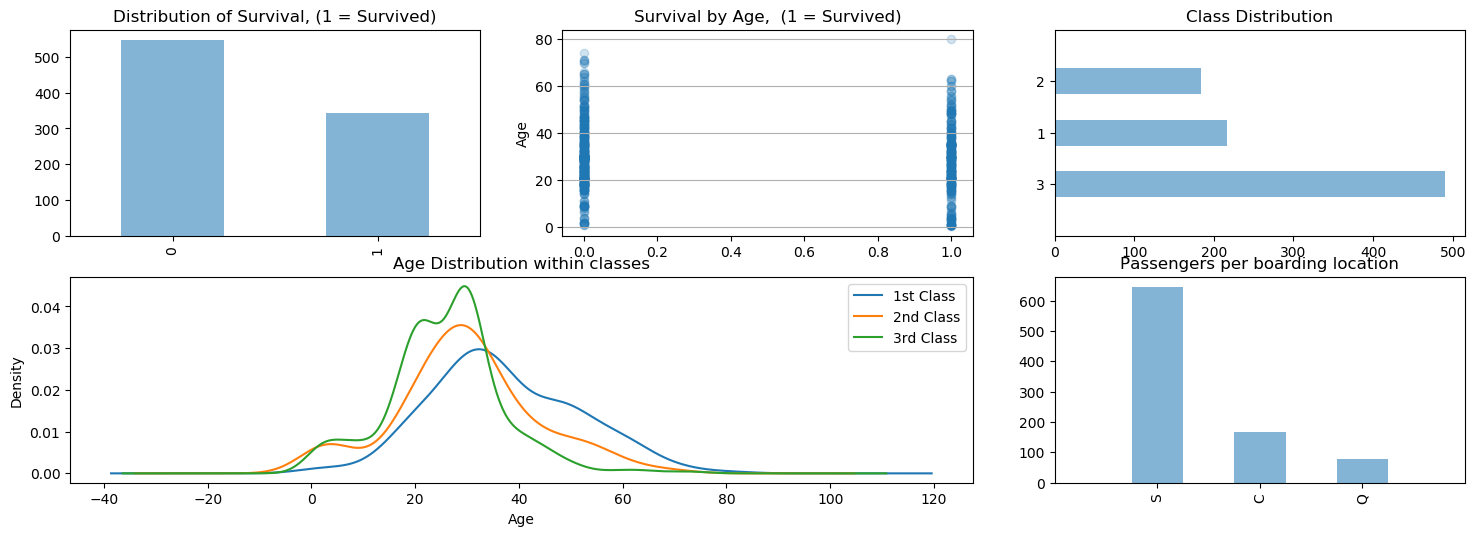

In [612]:
# menentukan parameter grafik kami
fig = plt.figure(figsize=(18,6), dpi=100) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55
# memungkinkan kita memplot banyak grafik berbentuk berbeda bersama-sama
ax1 = plt.subplot2grid((2,3),(0,0))
# memplot grafik batang dari mereka yang selamat vs mereka yang tidak.               
data_train.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# ini dengan baik mengatur margin di matplotlib untuk menangani bug 1.3.1 baru-baru iniax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((2,3),(0,1))
plt.scatter(data_train.Survived, data_train.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
data_train.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data_train.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# memplot perkiraan kepadatan kernel dari subset age penumpang kelas 1
data_train.Age[data_train.Pclass == 1].plot(kind='kde')    
data_train.Age[data_train.Pclass == 2].plot(kind='kde')
data_train.Age[data_train.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data_train.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

In [613]:
def bar_chart(feature):
    survived = data_train[data_train['Survived']==1][feature].value_counts()
    dead = data_train[data_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

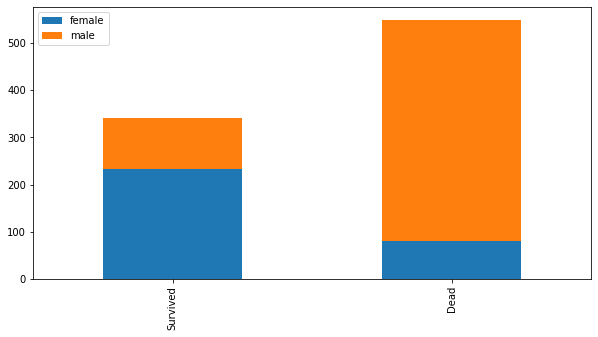

In [614]:
bar_chart('Sex')

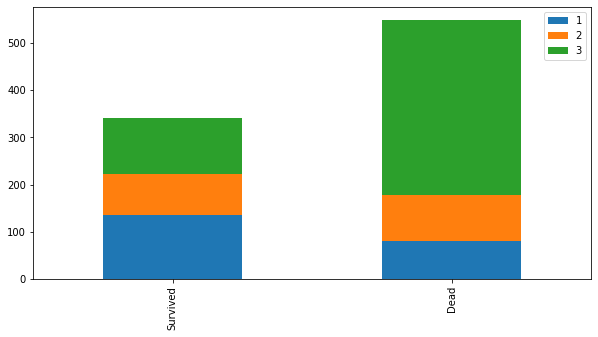

In [615]:
bar_chart('Pclass')

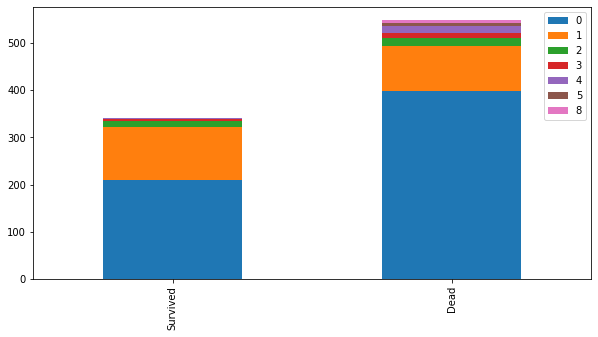

In [616]:
bar_chart('SibSp')

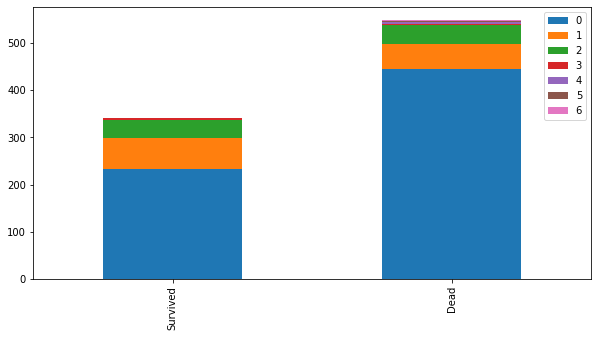

In [617]:
bar_chart('Parch')

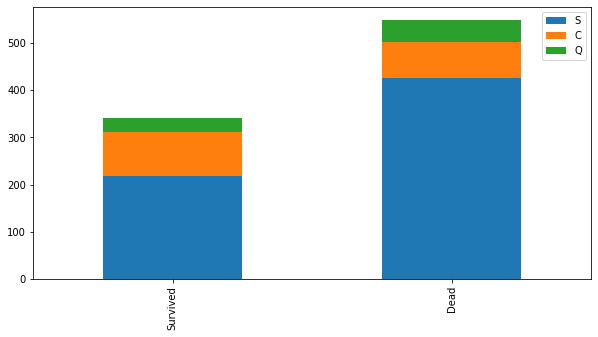

In [618]:
bar_chart('Embarked')

### Bining Data

sex

In [619]:
data_train.Sex = data_train.Sex.map({"male": 0, "female":1})
data_test.Sex = data_test.Sex.map({"male": 0, "female":1})

In [620]:
data_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,S,0


In [621]:
data_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,892,3,0,34.5,0,0,330911,7.8292,Q,0
1,893,3,1,47.0,1,0,363272,7.0000,S,2
2,894,2,0,62.0,0,0,240276,9.6875,Q,0
3,895,3,0,27.0,0,0,315154,8.6625,S,0
4,896,3,1,22.0,1,1,3101298,12.2875,S,2


embarked

In [622]:
data_train.Embarked = data_train.Embarked.map({"S": 0, "C": 1, "Q": 2})
data_test.Embarked = data_test.Embarked.map({"S": 0, "C": 1, "Q": 2})

In [623]:
train = data_train.drop('PassengerId',  axis=1)
data=data_test.PassengerId
test = data_test.drop(['PassengerId','Ticket'],  axis=1).copy()

In [624]:
# create X and y for data and target values
X = train.drop(['Survived','Ticket'], axis=1)
y = train.Survived

In [625]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,22.0,1,0,7.2500,0,0
1,1,1,38.0,1,0,71.2833,1,2
2,3,1,26.0,0,0,7.9250,0,1
3,1,1,35.0,1,0,53.1000,0,2
4,3,0,35.0,0,0,8.0500,0,0
5,3,0,30.0,0,0,8.4583,2,0
6,1,0,54.0,0,0,51.8625,0,0
7,3,0,2.0,3,1,21.0750,0,3
8,3,1,27.0,0,2,11.1333,0,2
9,2,1,14.0,1,0,30.0708,1,2


## Modeling 

In [635]:
# Importing Classifier Modules
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

SVM

In [627]:
svc = SVC()
svc.fit(X, y)
Y_pred = svc.predict(test)
acc_svc = round(svc.score(X, y) * 100, 2)
acc_svc

C:\Users\Faith\AppData\Roaming\Python\Python37\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


90.8

KNN

In [628]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X, y)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(X,y) * 100, 2)
acc_knn

84.29

In [629]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X, y)
Y_pred = gaussian.predict(test)
acc_gaussian = round(gaussian.score(X, y) * 100, 2)
acc_gaussian

80.81

In [630]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)
Y_pred = decision_tree.predict(test)
acc_decision_tree = round(decision_tree.score(X, y) * 100, 2)
acc_decision_tree

98.09

In [631]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X, y)
Y_pred = random_forest.predict(test)
random_forest.score(X, y)
acc_random_forest = round(random_forest.score(X,y) * 100, 2)
acc_random_forest

97.98

In [632]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, 
              acc_random_forest, acc_gaussian, 
              acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
4,Decision Tree,98.09
2,Random Forest,97.98
0,Support Vector Machines,90.80
1,KNN,84.29
3,Naive Bayes,80.81


In [639]:
submission = pd.DataFrame({
        "PassengerId": data,
        "Survived": Y_pred
    })

submission.to_csv('submission.csv', index=False)